# **Task 1: Preprocess the Data**

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

file_path = '/content/diabetes_012_health_indicators_BRFSS2021.csv'
data = pd.read_csv(file_path)

# Defining categorical and numerical columns
categorical_columns = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
                       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
                       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                       'DiffWalk', 'Sex']

# Converting the categorical columns to category type
for col in categorical_columns:
    data[col] = data[col].astype('category')

numerical_columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

imputer = SimpleImputer(strategy='mean')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

data.to_csv('preprocessed_data.csv', index=False)

preprocessed_data = pd.read_csv('preprocessed_data.csv')

print("Information about the preprocessed data:")
print("---------------------------------------")
print(preprocessed_data.info())

print("\nSummary statistics of numerical columns:")
print("---------------------------------------")
print(preprocessed_data.describe())

print("\nMissing values check:")
print("---------------------")
print(preprocessed_data.isnull().sum())


Information about the preprocessed data:
---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          236378 non-null  float64
 1   HighBP                236378 non-null  int64  
 2   HighChol              236378 non-null  float64
 3   CholCheck             236378 non-null  int64  
 4   BMI                   236378 non-null  float64
 5   Smoker                236378 non-null  float64
 6   Stroke                236378 non-null  float64
 7   HeartDiseaseorAttack  236378 non-null  float64
 8   PhysActivity          236378 non-null  int64  
 9   Fruits                236378 non-null  int64  
 10  Veggies               236378 non-null  int64  
 11  HvyAlcoholConsump     236378 non-null  int64  
 12  AnyHealthcare         236378 non-null  int64  
 13  NoDocbcCost           2

# **Task 2: Plot Detailed Graphs for Each Column**

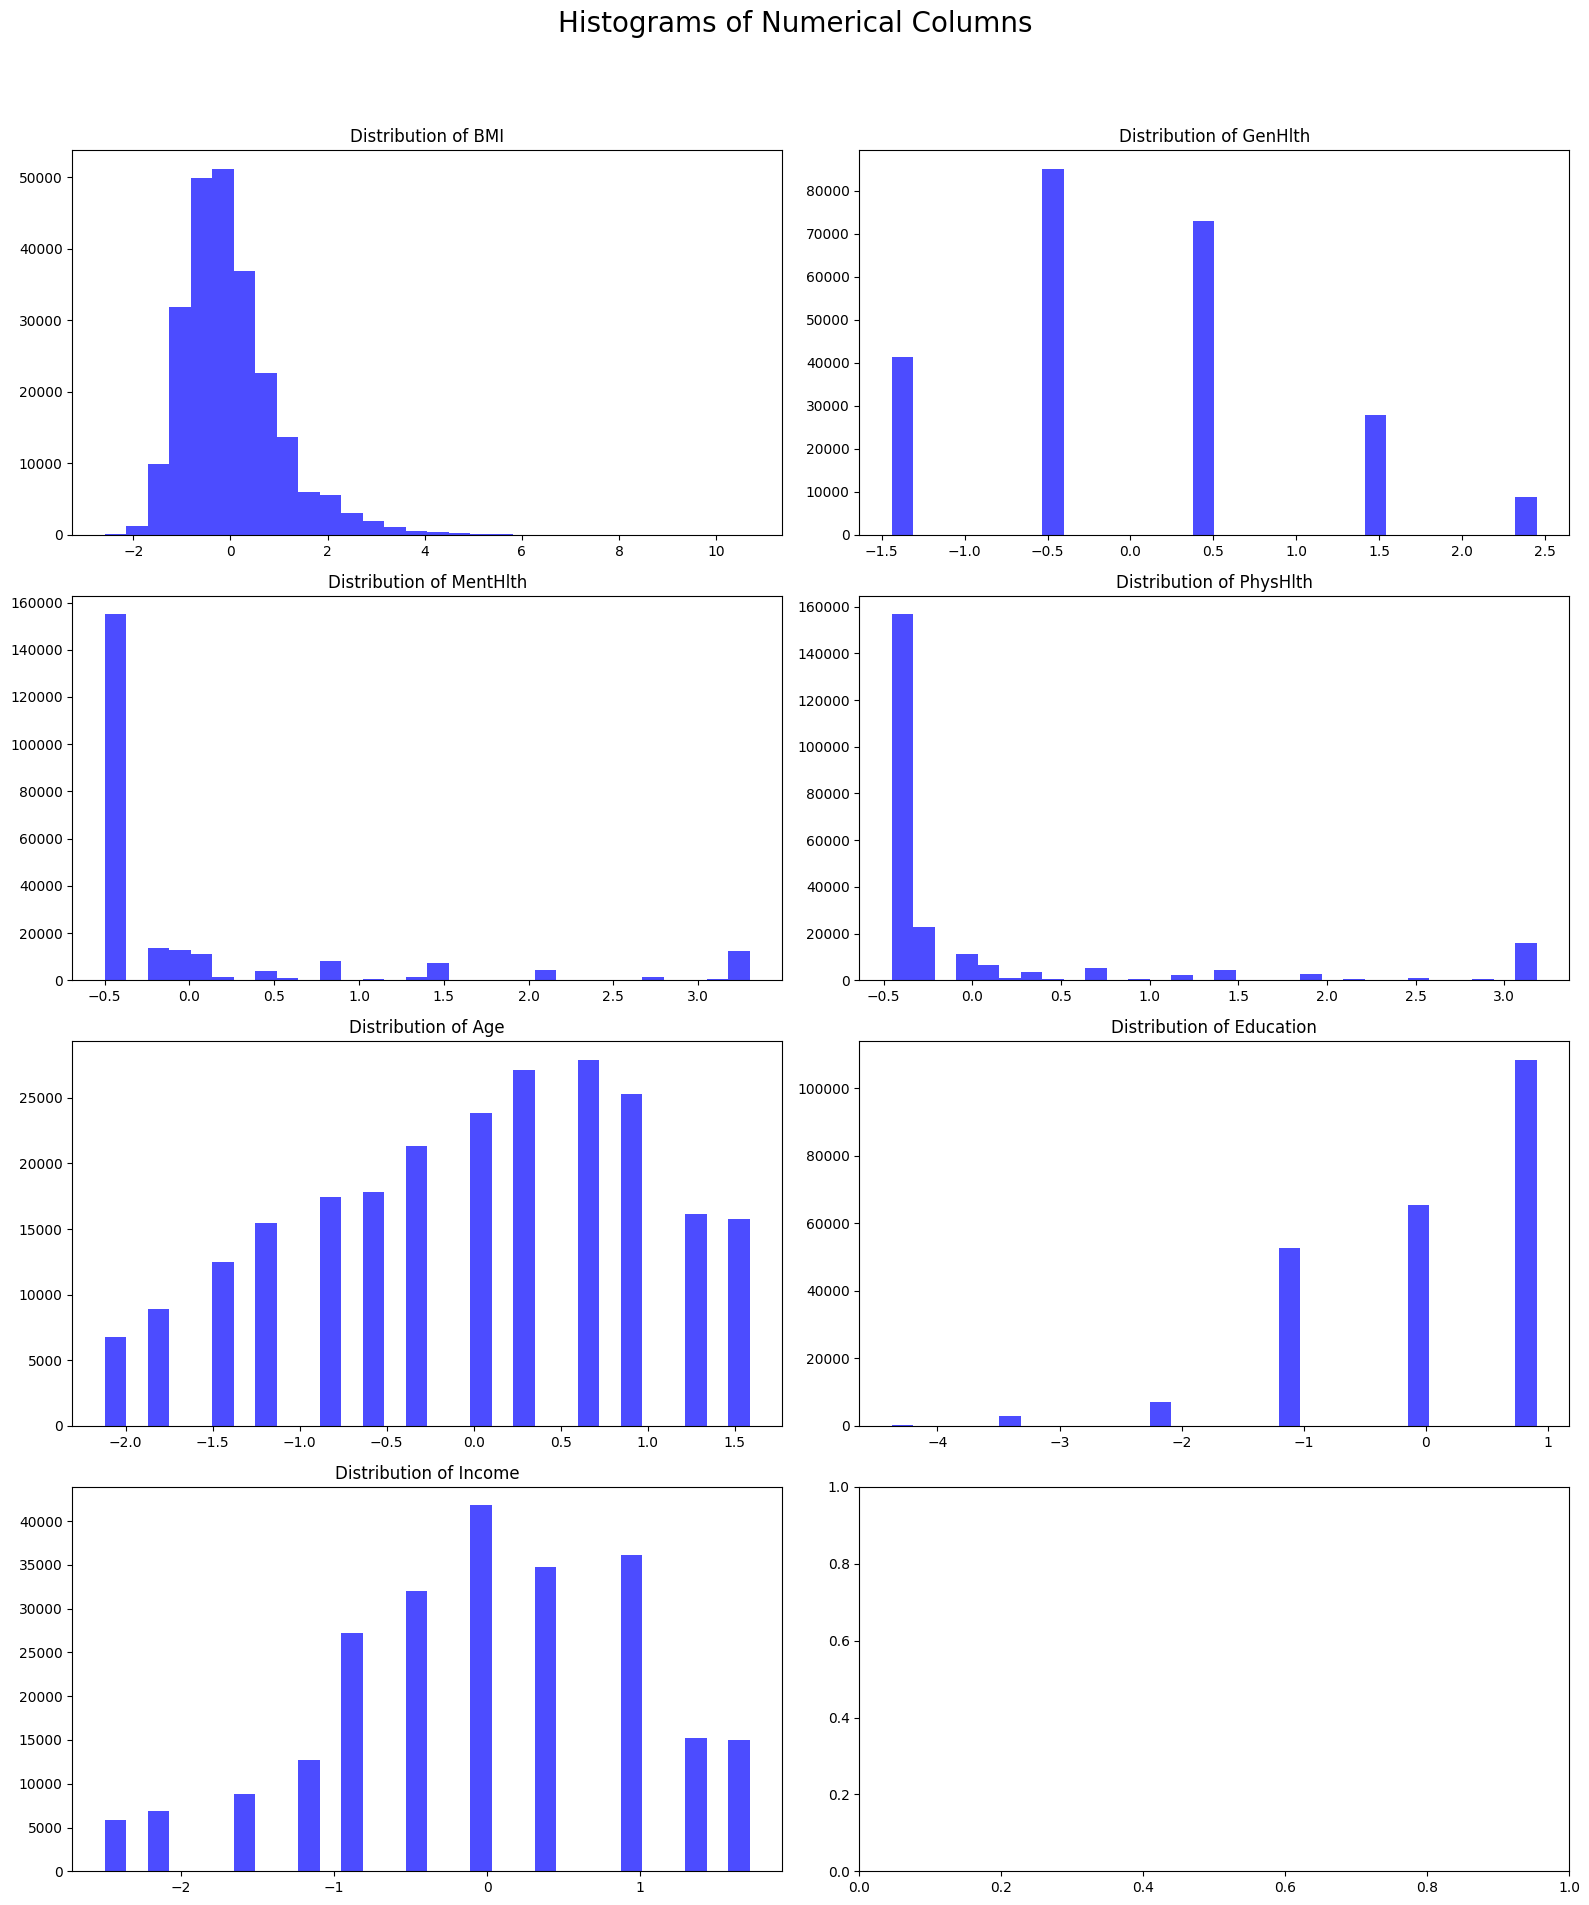

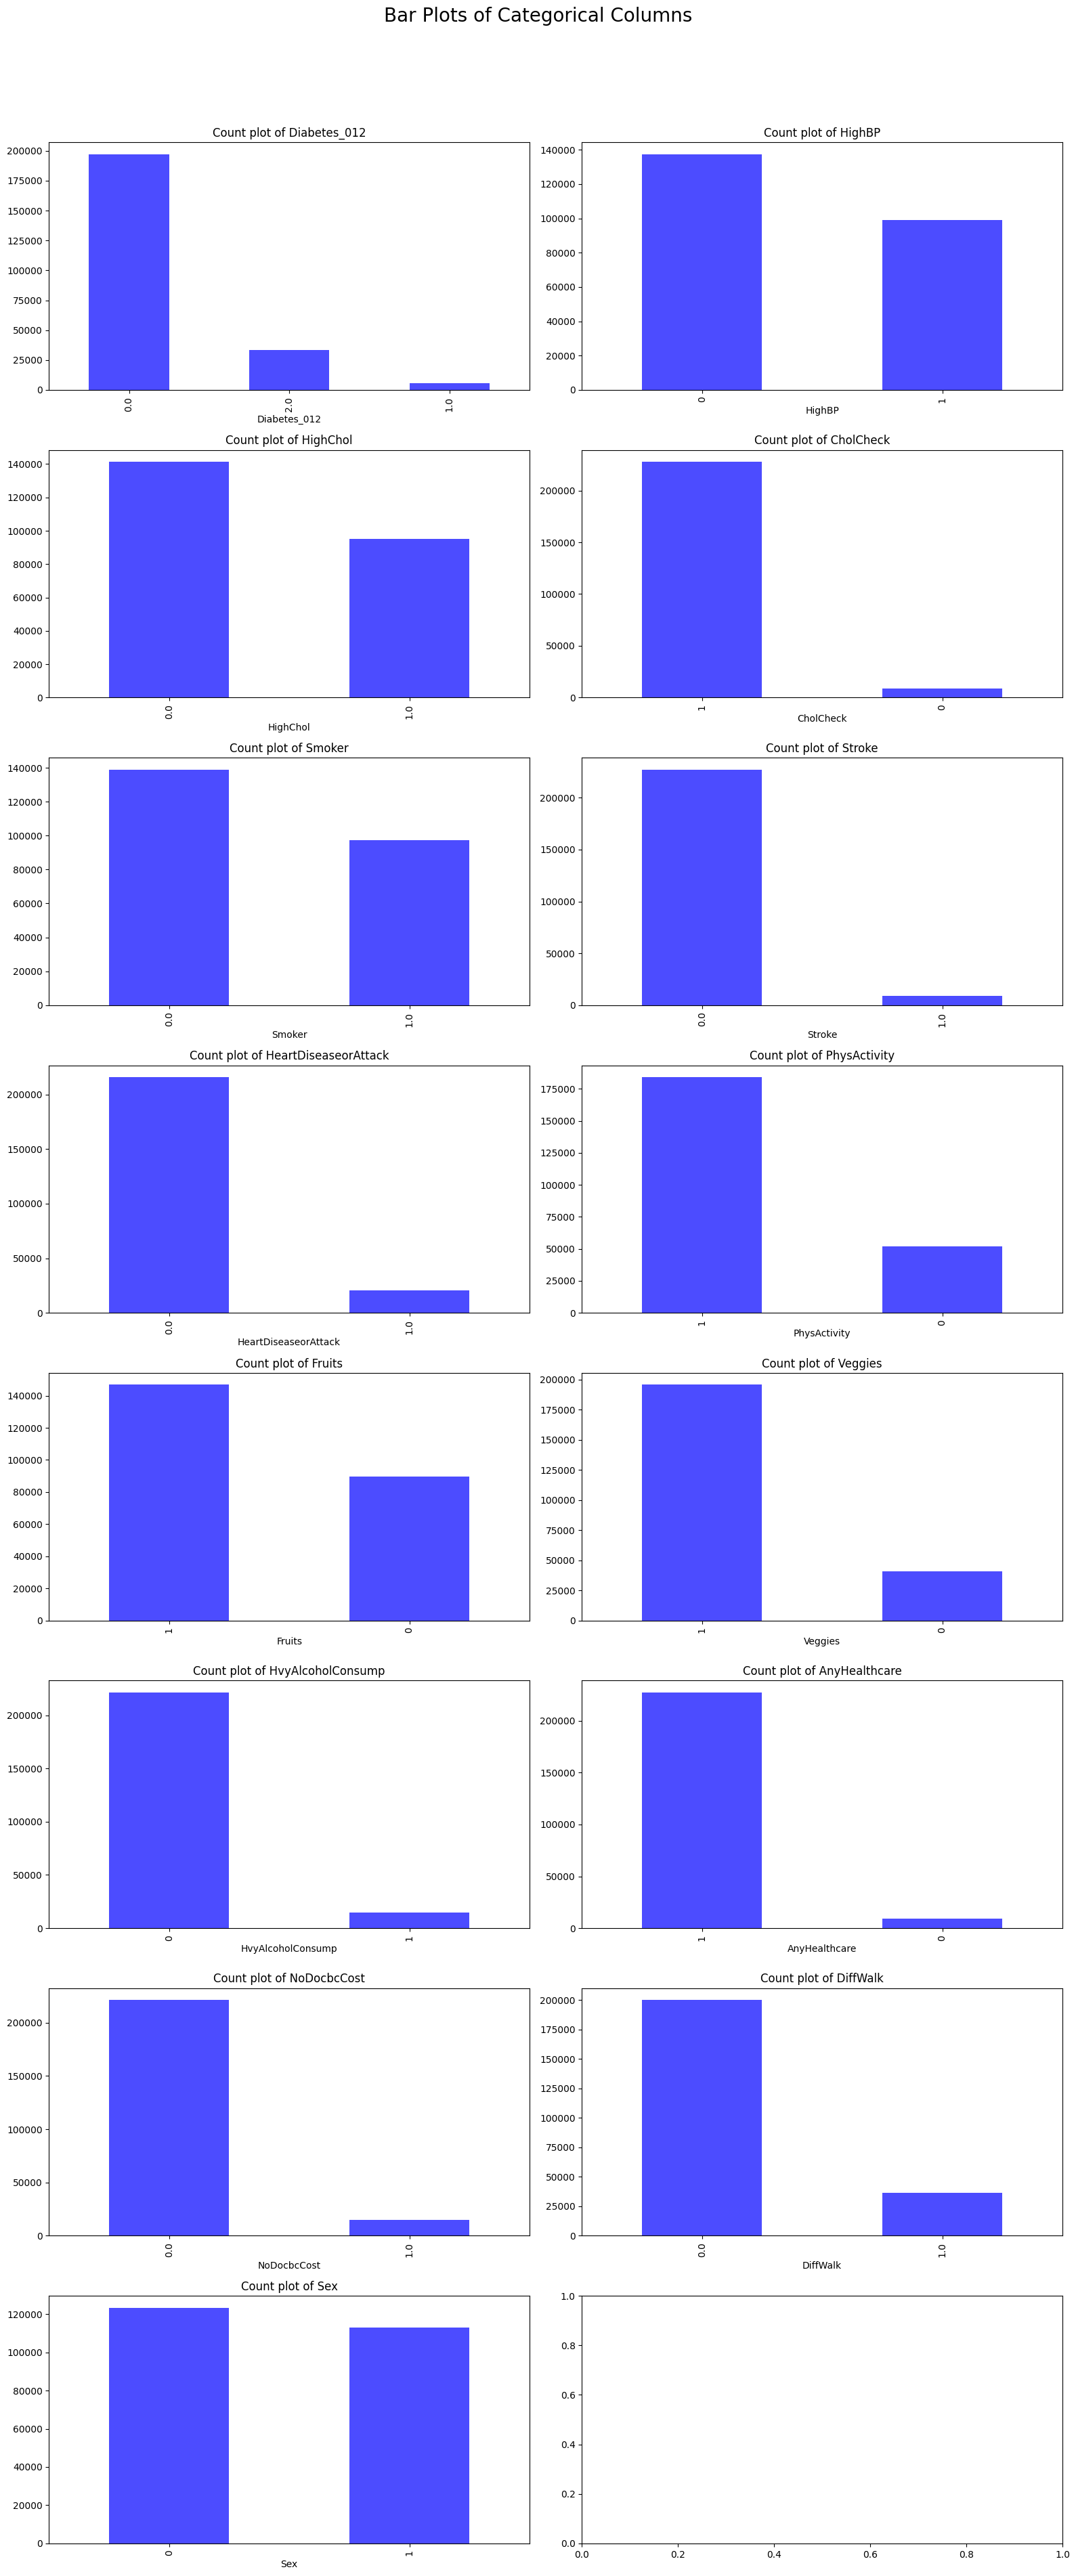

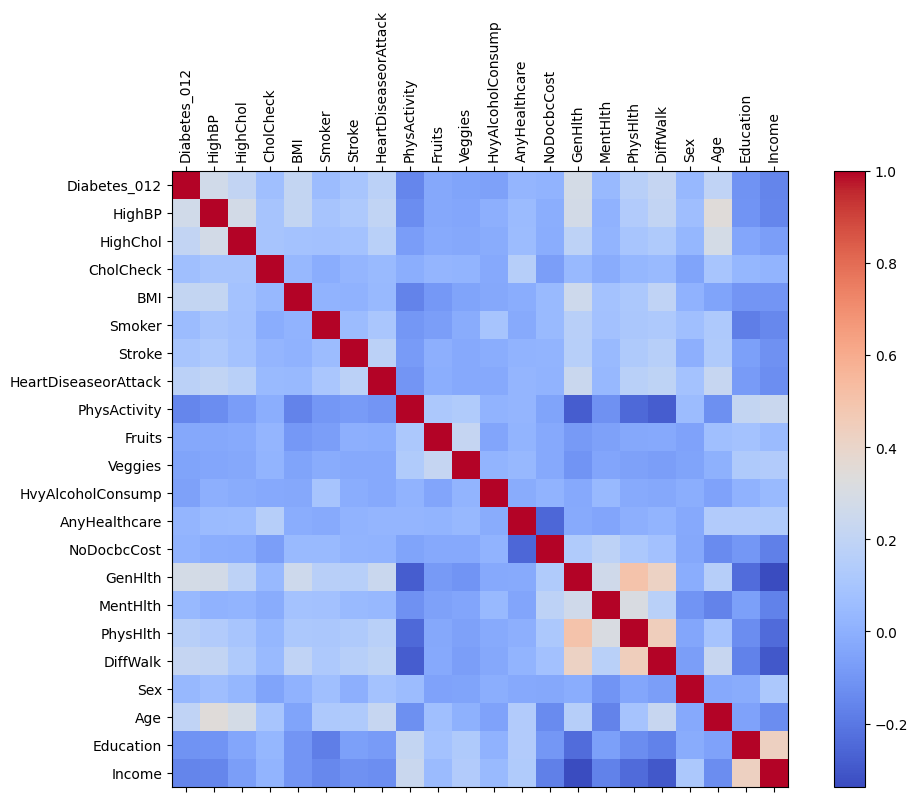

In [3]:
import matplotlib.pyplot as plt

data = pd.read_csv('preprocessed_data.csv')

numerical_columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
fig.suptitle('Histograms of Numerical Columns', fontsize=20)

for i, col in enumerate(numerical_columns):
    ax = axes[i//2, i%2]
    ax.hist(data[col], bins=30, color='blue', alpha=0.7)
    ax.set_title(f'Distribution of {col}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

categorical_columns = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
                       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
                       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                       'DiffWalk', 'Sex']

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(16, 40))
fig.suptitle('Bar Plots of Categorical Columns', fontsize=20)

for i, col in enumerate(categorical_columns):
    ax = axes[i//2, i%2]
    data[col].value_counts().plot(kind='bar', ax=ax, color='blue', alpha=0.7)
    ax.set_title(f'Count plot of {col}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


corr = data.corr()
fig, ax = plt.subplots(figsize=(12, 8))
cax = ax.matshow(corr, cmap='coolwarm')
fig.colorbar(cax)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

# **Task 3: Analyze the Data and Train the Model**

In [4]:
# Training a Gradient Boosting Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier


data = pd.read_csv('preprocessed_data.csv')

X = data.drop('Diabetes_012', axis=1)
y = data['Diabetes_012'].astype('category').cat.codes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

# **Task 4: Test the Trained Model**

In [5]:
y_pred = gb_model.predict(X_test)
print("Predictions:")
print(y_pred)

Predictions:
[0 0 0 ... 0 0 0]


# **Task 5: Evaluate and Tune the Model**

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


total_fits = len(param_grid['n_estimators']) * \
             len(param_grid['learning_rate']) * \
             len(param_grid['max_depth']) * \
             len(param_grid['subsample']) * \
             len(param_grid['min_samples_split']) * \
             len(param_grid['min_samples_leaf'])

print(f'Total number of fits: {total_fits}')

gb_model = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f'Best parameters found: {grid_search.best_params_}')

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

print(f'Tuned Accuracy: {accuracy_score(y_test, y_pred_tuned)}')
print('Tuned Model Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_tuned))
print('Tuned Model Classification Report:')
print(classification_report(y_test, y_pred_tuned))


Accuracy: 0.8421820797021745
Confusion Matrix:
[[38643     0   865]
 [  985     0    94]
 [ 5517     0  1172]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91     39508
           1       0.00      0.00      0.00      1079
           2       0.55      0.18      0.27      6689

    accuracy                           0.84     47276
   macro avg       0.47      0.38      0.39     47276
weighted avg       0.79      0.84      0.80     47276

Total number of fits: 144
Fitting 3 folds for each of 144 candidates, totalling 432 fits


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best parameters found: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Tuned Accuracy: 0.8425628225738218
Tuned Model Confusion Matrix:
[[38675     0   833]
 [  990     0    89]
 [ 5530     1  1158]]
Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91     39508
           1       0.00      0.00      0.00      1079
           2       0.56      0.17      0.26      6689

    accuracy                           0.84     47276
   macro avg       0.47      0.38      0.39     47276
weighted avg       0.79      0.84      0.80     47276

